# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations
The weather does get warmer the closer you get to the equator, and colder the further away you get.
Amongst my graphs, the "Northern Hemisphere - Max Temp vs. Latitude Linear Regression" has the closest to 1 r-squared value which means most of the data fits the regression model.
Humidity, Cloudiness, and Wind Speed don't appear to be affected by latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

651


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 651: Rikitea
Processing Record 2 of 651: Busselton
Processing Record 3 of 651: Vaini
Processing Record 4 of 651: Jamestown
City not found. Skipping...
Processing Record 6 of 651: East London
Processing Record 7 of 651: Tuktoyaktuk
Processing Record 8 of 651: Bengkulu
Processing Record 9 of 651: Albany
City not found. Skipping...
Processing Record 11 of 651: Carnarvon
Processing Record 12 of 651: Sinnamary
Processing Record 13 of 651: Pangnirtung
Processing Record 14 of 651: Punta Arenas
Processing Record 15 of 651: Mandurah
Processing Record 16 of 651: Ancud
Processing Record 17 of 651: Douentza
Processing Record 18 of 651: Portland
Processing Record 19 of 651: Te Anau
Processing Record 20 of 651: Ribeira Grande
Processing Record 21 of 651: Sitka
Processing Record 22 of 651: Bredasdorp
Processing Record 23 of 651: Ushuaia
Processing Record 24 of 651: Mahébourg
Processing Record 25 of 651: St. George's
Process

Processing Record 212 of 651: Guatire
Processing Record 213 of 651: Bichena
Processing Record 214 of 651: Severo-Kuril'sk
Processing Record 215 of 651: Vikhorevka
City not found. Skipping...
City not found. Skipping...
Processing Record 218 of 651: Hithadhoo
Processing Record 219 of 651: Souillac
City not found. Skipping...
Processing Record 221 of 651: Bitung
Processing Record 222 of 651: Arraial do Cabo
Processing Record 223 of 651: Abnūb
Processing Record 224 of 651: Boca do Acre
Processing Record 225 of 651: Lashio
Processing Record 226 of 651: Angoram
Processing Record 227 of 651: Beaverlodge
Processing Record 228 of 651: Kirovskiy
City not found. Skipping...
Processing Record 230 of 651: Jiwani
Processing Record 231 of 651: Yellowknife
Processing Record 232 of 651: Nanortalik
Processing Record 233 of 651: Port-de-Bouc
Processing Record 234 of 651: Klaksvík
Processing Record 235 of 651: Kansanshi
City not found. Skipping...
Processing Record 237 of 651: Sisimiut
Processing Record 

Processing Record 424 of 651: Prince Rupert
Processing Record 425 of 651: Esmeraldas
Processing Record 426 of 651: São Gabriel da Cachoeira
City not found. Skipping...
Processing Record 428 of 651: Wattegama
Processing Record 429 of 651: La Rioja
Processing Record 430 of 651: Sovetskiy
Processing Record 431 of 651: Zhigansk
Processing Record 432 of 651: Esim
Processing Record 433 of 651: Pombas
Processing Record 434 of 651: Veinticinco de Mayo
Processing Record 435 of 651: Asilah
Processing Record 436 of 651: Gornopravdinsk
Processing Record 437 of 651: Acajutla
Processing Record 438 of 651: The Valley
Processing Record 439 of 651: Plastun
Processing Record 440 of 651: Marrakesh
Processing Record 441 of 651: Broken Hill
Processing Record 442 of 651: Leningradskiy
Processing Record 443 of 651: Narsaq
Processing Record 444 of 651: Quatre Cocos
Processing Record 445 of 651: Paamiut
Processing Record 446 of 651: Nyurba
Processing Record 447 of 651: Yafran
Processing Record 448 of 651: Shīe

Processing Record 639 of 651: Gevrai
Processing Record 640 of 651: Toamasina
Processing Record 641 of 651: Santa Marta
Processing Record 642 of 651: Lichuan
Processing Record 643 of 651: Deputatsky
Processing Record 644 of 651: Bereda
Processing Record 645 of 651: Malinovskiy
Processing Record 646 of 651: Krasnokamensk
Processing Record 647 of 651: Mokhsogollokh
Processing Record 648 of 651: Griffith
Processing Record 649 of 651: Gabú
Processing Record 650 of 651: Madawaska
Processing Record 651 of 651: Makakilo City
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# to convert timestamp to regular date
from datetime import datetime

converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# read csv file
df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": converted_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
df.count()

City               600
Country            600
Date               600
Latitude           600
Longitude          600
Cloudiness         600
Humidity           600
Max Temperature    600
Wind Speed         600
dtype: int64

In [5]:
# print data frame
df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Rikitea,PF,2020-09-10 15:22:36,-23.12,-134.97,100,82,73.51,19.95
1,Busselton,AU,2020-09-10 15:22:37,-33.65,115.33,68,78,46.99,3.18
2,Vaini,TO,2020-09-10 15:22:37,-21.20,-175.20,75,88,73.40,11.41
3,Jamestown,US,2020-09-10 15:20:15,42.10,-79.24,90,83,73.00,3.36
4,East London,ZA,2020-09-10 15:22:37,-33.02,27.91,20,87,60.80,5.82
...,...,...,...,...,...,...,...,...,...
595,Mokhsogollokh,RU,2020-09-10 15:24:33,61.47,128.92,99,75,46.22,3.89
596,Griffith,US,2020-09-10 15:20:08,41.53,-87.42,75,72,66.00,10.29
597,Gabú,GW,2020-09-10 15:24:34,12.28,-14.22,100,88,80.42,3.42
598,Madawaska,US,2020-09-10 15:24:34,47.36,-68.33,90,93,53.01,5.82


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

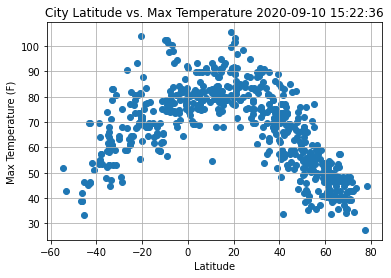

In [8]:
# create scatter plot
plt.scatter(df["Latitude"], df["Max Temperature"])

# add labels and title
plt.title(f"City Latitude vs. Max Temperature {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/1LatvTemp.png")
plt.show()

Graph Explanation

This scatterplot shows the relationship between the max temperature (F) in each city based on its latitude. Based on the results, it seems the closer you get to the equator the hotter it gets, and the further away, the colder it gets.

## Latitude vs. Humidity Plot

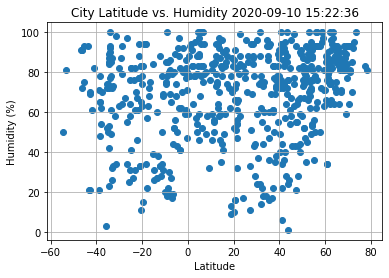

In [9]:
# create scatter plot
plt.scatter(df["Latitude"], df["Humidity"])

# add labels and title
plt.title(f"City Latitude vs. Humidity {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/2LatvHumid.png")
plt.show()

Graph Explanation

This scatterplot shows the relationship between the humidity (%) in each city based on its latitude. Based on the results, it does not seem that latitude affects humidity since the data points are all over the place.

## Latitude vs. Cloudiness Plot

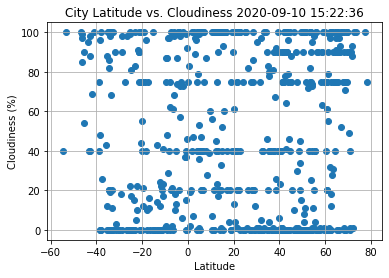

In [10]:
# create scatter plot
plt.scatter(df["Latitude"], df["Cloudiness"])

# add labels and title
plt.title(f"City Latitude vs. Cloudiness {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/3LatvCloud.png")
plt.show()

Graph Explanation

This scatterplot shows the relationship between the cloudiness (%) in each city based on its latitude. Based on the results, it does not seem that latitude affects cloudiness since the data points are all over the place.

## Latitude vs. Wind Speed Plot

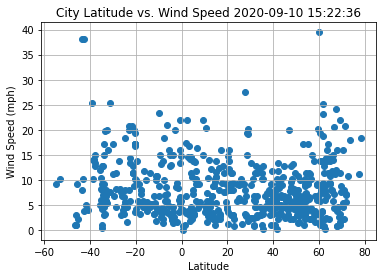

In [11]:
# create scatter plot
plt.scatter(df["Latitude"], df["Wind Speed"])

# add labels and title
plt.title(f"City Latitude vs. Wind Speed {converted_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/4LatvWind.png")
plt.show()

Graph Explanation

This scatterplot shows the relationship between the wind speed (mph) in each city based on its latitude. Based on the results, it does not seem that latitude affects wind speed since the data points are all over the place.

## Linear Regression

In [12]:
# x axis for noth and souht
nx_values = []
sx_values = []

# y axis for temp
ny_values = []
sy_values = []

# y axis for humidity
nhy_values = []
shy_values = []

# y axis for cloudiness
ncy_values = []
scy_values = []

# y axis for wind speed
nwy_values = []
swy_values = []

# create index
indexes = range(0, len(df["City"]))

# append arrays
for index in indexes:
    if df["Latitude"][index] >= 0:
        nx_values.append(df["Latitude"][index])
        ny_values.append(df["Max Temperature"][index])
        nhy_values.append(df["Humidity"][index])
        ncy_values.append(df["Cloudiness"][index])
        nwy_values.append(df["Wind Speed"][index])
    if df["Latitude"][index] < 0:
        sx_values.append(df["Latitude"][index])
        sy_values.append(df["Max Temperature"][index])
        shy_values.append(df["Humidity"][index])
        scy_values.append(df["Cloudiness"][index])
        swy_values.append(df["Wind Speed"][index])
        
 # convert all array values from float to integer
nx_values = np.array(nx_values, dtype = "int")
sx_values = np.array(sx_values, dtype = "int")
ny_values = np.array(ny_values, dtype = "int")
sy_values = np.array(sy_values, dtype = "int")
nhy_values = np.array(nhy_values, dtype = "int")
shy_values = np.array(shy_values, dtype = "int")
ncy_values = np.array(ncy_values, dtype = "int")
scy_values = np.array(scy_values, dtype = "int")
nwy_values = np.array(nwy_values, dtype = "int")
swy_values = np.array(swy_values, dtype = "int")

print(len(nx_values))
print(len(sx_values))

418
182


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8184288041937041


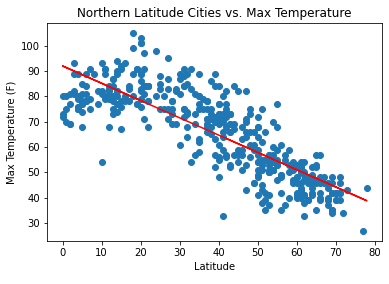

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ny_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ny_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/5NLatvTemp.png")
plt.show()

Northern Hemisphere: Latitude vs. Max Temp Analysis

The linear regression line shows a downward slope, therefore the decrease in temperature is due to the increase in lattitude. It can be concluded that as we move away from the equator the temperature gets lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.677413317893435


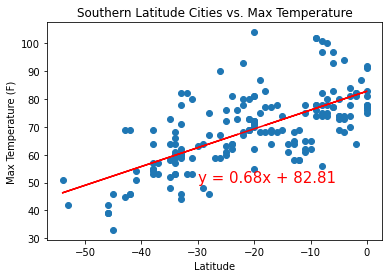

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, sy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, sy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/6SLatvTemp.png")
plt.show()

Southern Hemisphere: Latitude vs. Max Temp Analysis

The linear regression line shows a upward slope, therefore the increase in temperature is due to the decrease in lattitude. It can be concluded that as we move closer to the equator the temperature gets higher.

Graph Explanation

These scatterplots shows the relationship between the max temperature (F) in each northern and southern city based on its latitude. Based on the results, it seems the closer you get to the equator the hotter it gets, and the further away, the colder it gets. The Northern graph has a higher r-squared value because it has more of data points (391 vs 171) from the original.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1437492965537418


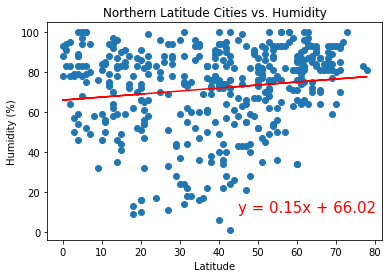

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nhy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nhy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/7NLatvHumid.png")
plt.show()

Northern Hemisphere: Latitude vs. Humidity Plot

The regression line shows an slight upward trend however it can not be used to draw a conclusion.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07762666707544964


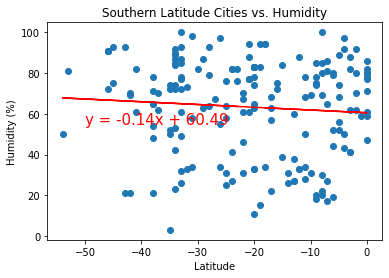

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, shy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, shy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/8SLatvHumid.png")
plt.show()

Southern Hemisphere: Latitude vs. Humidity Plot

The regression line shows an slight downward trend however it can not be used to draw a conclusion.

Graph Explanation

These scatterplots shows the relationship between the humidity (%) in each northern and southern city based on its latitude. Based on the results, it does not seem that latitude affects humidity since the data points are all over the place.



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03478731057981521


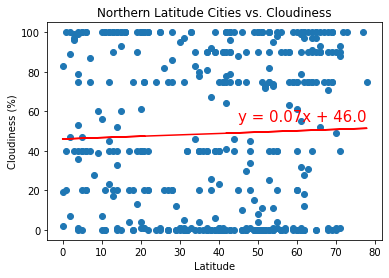

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, ncy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, ncy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/9NLatvCloud.png")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Analysis

The regression line shows an slight upward trend however it can not be used to draw a conclusion.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.12747545552150524


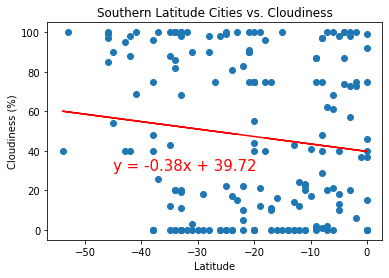

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, scy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, scy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/10SLatvCloud.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Analysis

The regression line shows an slight downward trend however it can not be used to draw a conclusion.

Graph Explanation

These scatterplots shows the relationship between the cloudiness (%) in each northern and southern city based on its latitude. Based on the results, it does not seem that latitude affects cloudiness since the data points are all over the place.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07176513455196479


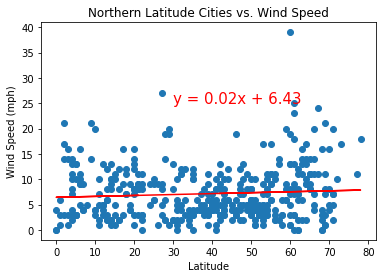

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nx_values, nwy_values)
regress_values = nx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx_values, nwy_values)
plt.plot(nx_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/11NLatvWind.png")
plt.show()

Northern Hemisphere - Wind Speed vs. Latitude Analysis

The regression line shows a slight upward trend however it can not be used to draw a conclusion.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12991611517009435


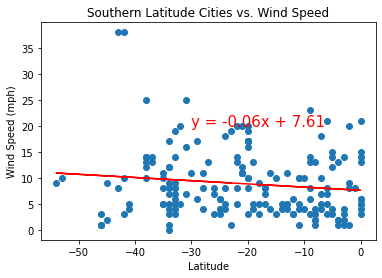

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sx_values, swy_values)
regress_values = sx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx_values, swy_values)
plt.plot(sx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("Southern Latitude Cities vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# show and save pic
plt.savefig("../output_data/12sLatvWind.png")
plt.show()

Southern Hemisphere - Wind Speed vs. Latitude Analysis

The regression line shows a slight downward trend however it can not be used to draw a concrete conclusion.

Graph Explanation

These scatterplots shows the relationship between the wind speed (mph) in each northern and southern city based on its latitude. 
Based on the results, it does not seem that latitude affects wind speed since the data points are all over the place.